<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?  
34% of interactions resulted in a purchase.

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
There is a lot of window shopping. On average the more sessions, the longer interaction time, and the more events in the shopping journey the more likely a customer is to make a purchase.  However, the differences are not that great bewtween people who purchase and those who don't. (See window shopping means below.) 
    
    From the perspective of classification, is the data balanced?  
 No it is not balanced.  A balanced dataset would have approximately the same number of positive and negative rows.

In [2]:
# YOUR CODE HERE
print('Purchased Percentages')
print(past['Purchased?'].value_counts(normalize=True))

Purchased Percentages
0    0.6562
1    0.3438
Name: Purchased?, dtype: float64


In [3]:
window_shopping1 = past.groupby('Purchased?')['NumSessions'].mean()
print("Num Sessions Mean")
print(window_shopping1)

window_shopping2 = past.groupby('Purchased?')['interactionTime'].mean()
print("Interaction Time Mean")
print(window_shopping2)

window_shopping3 = past.groupby('Purchased?')['NumOfEventsInJourney'].mean()
print("NumOfEventsInJourney Mean")
print(window_shopping3)

Num Sessions Mean
Purchased?
0    1.287649
1    1.402259
Name: NumSessions, dtype: float64
Interaction Time Mean
Purchased?
0    212101.185942
1    319495.639610
Name: interactionTime, dtype: float64
NumOfEventsInJourney Mean
Purchased?
0    1.872303
1    2.101440
Name: NumOfEventsInJourney, dtype: float64


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [4]:
# YOUR CODE HERE
past.drop(columns=['product_id', 'user_id'], inplace=True)
X = past
y = past.pop("Purchased?")

In [5]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? YES 
    
    Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [6]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=5)
pca.fit(X)
X_reduced = pca.transform(X)


In [7]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [8]:
pca.explained_variance_ratio_

array([0.10281911, 0.09445354, 0.06511294, 0.05088512, 0.04053946])

In [7]:
# YOUR CODE HERE

Explained variation per principal component: [0.10 0.09 0.07 0.05 0.04]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [9]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [10]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

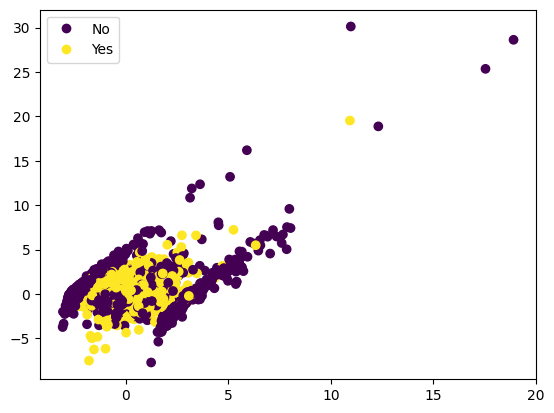

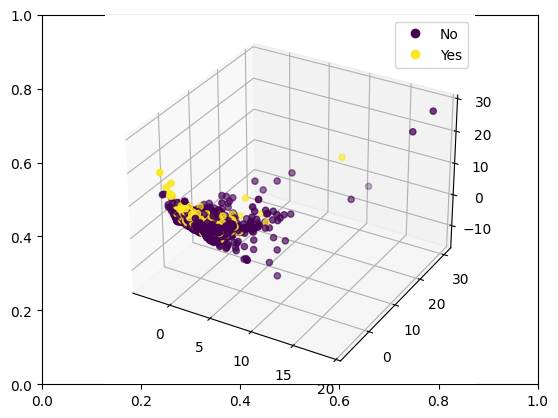

In [11]:
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)

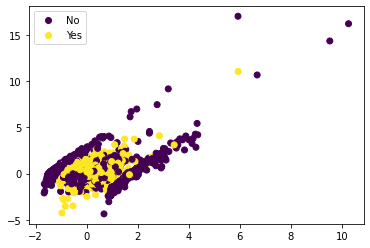

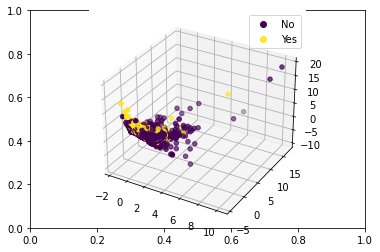

In [10]:
# YOUR CODE HERE
# YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [12]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    if standardize == True:
        pipe = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression(class_weight='balanced',random_state=0))])
    else:
        pipe = Pipeline([('classifier', LogisticRegression(class_weight='balanced',random_state=0))])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    

In [13]:
train(X, y, standardize = True)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Now apply the pipeline on the all the features `X` and review the performance

In [12]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



In [15]:
train(X_reduced, y, standardize = False)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       649
           1       0.51      0.54      0.52       351

    accuracy                           0.66      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.66      0.66      0.66      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [13]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*
The results are as expected - the model with the full set of features performs a bit better.  The model with the reduced features had PCA values that only explained 35% of the variance hence I would expect it to perform worse. A weakness of using PCA is if the model needs to be interpretable then it will be difficult to explain the results using the principal components as inputs. A benefit of using PCA is that it removes multicollinearity from the inputs. This will make the model generalize better and fewer inputs will decrease the computation time needed for the model.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [16]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [17]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

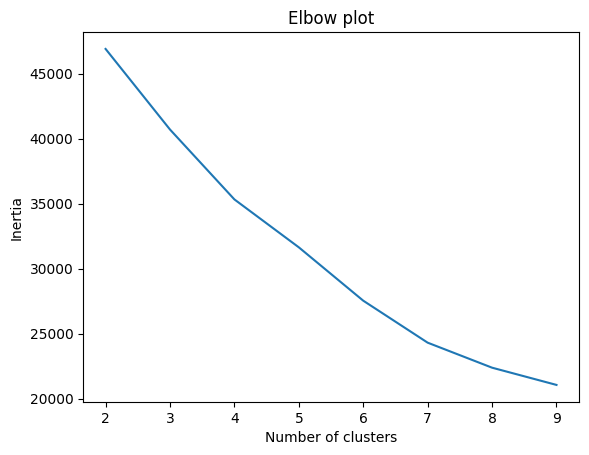

In [18]:
visualize_elbow(X_reduced, range(2,10))

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

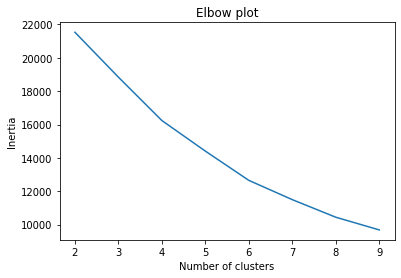

In [16]:
# YOUR CODE HERE

4. What are the disadvantage to use the Elbow method? 

The optimal number of clusters looks to be between 4 and 7.  A disadvantage of the elbow method is that inertia will always be decreasing as the number of clusters increases and it can be difficult to determine where the elbow point is in the graph. Hence it can be difficult to determine the  'optimal' number of clusters when the elbow point is not obvious.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [19]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.24927615399016476
For n_clusters = 3 The average silhouette_score is : 0.25783701586216656
For n_clusters = 4 The average silhouette_score is : 0.27174278302173827
For n_clusters = 5 The average silhouette_score is : 0.23772331525427218
For n_clusters = 6 The average silhouette_score is : 0.24128986909336272
For n_clusters = 7 The average silhouette_score is : 0.24886514547483934
For n_clusters = 8 The average silhouette_score is : 0.24815576123149158


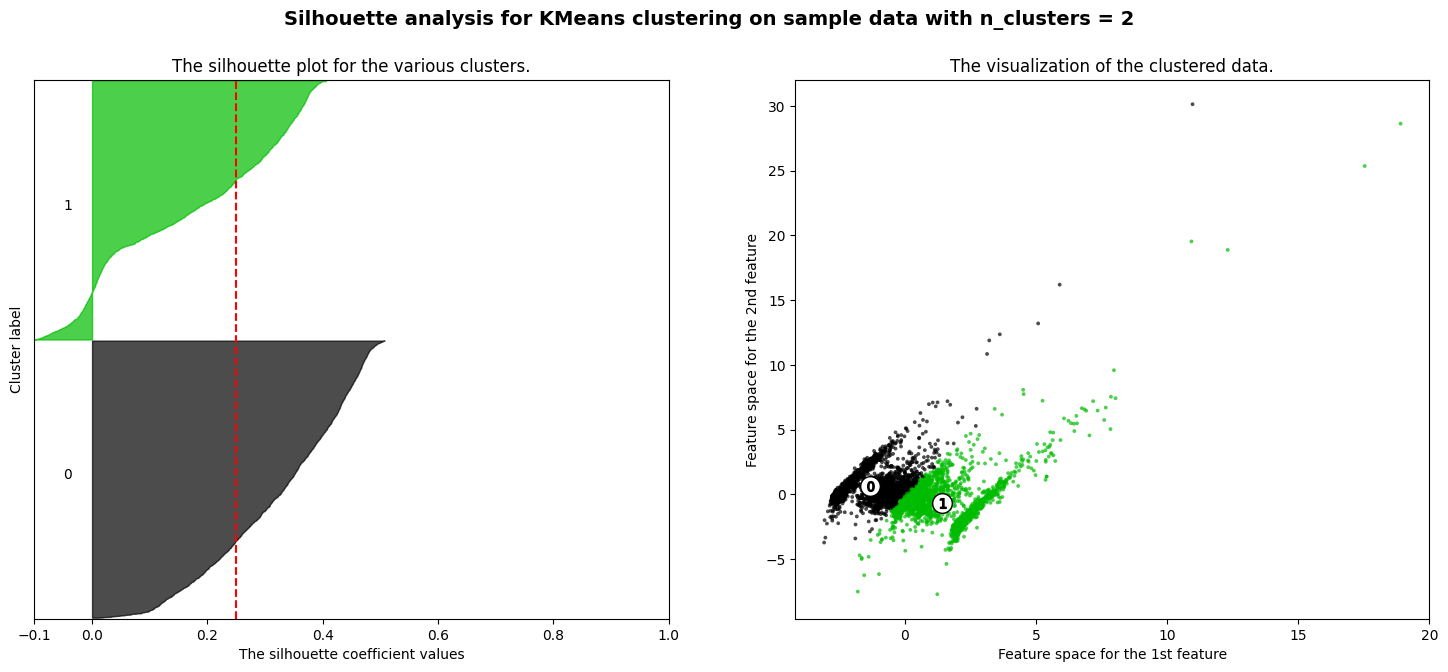

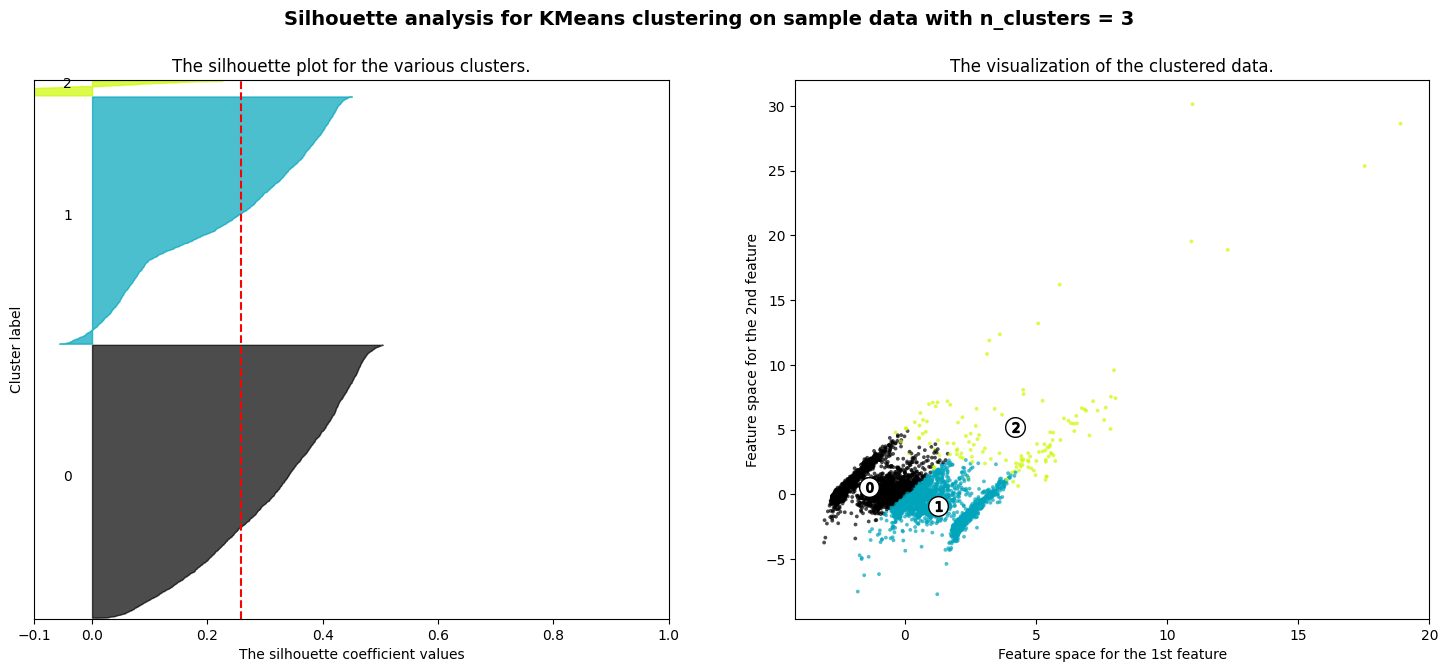

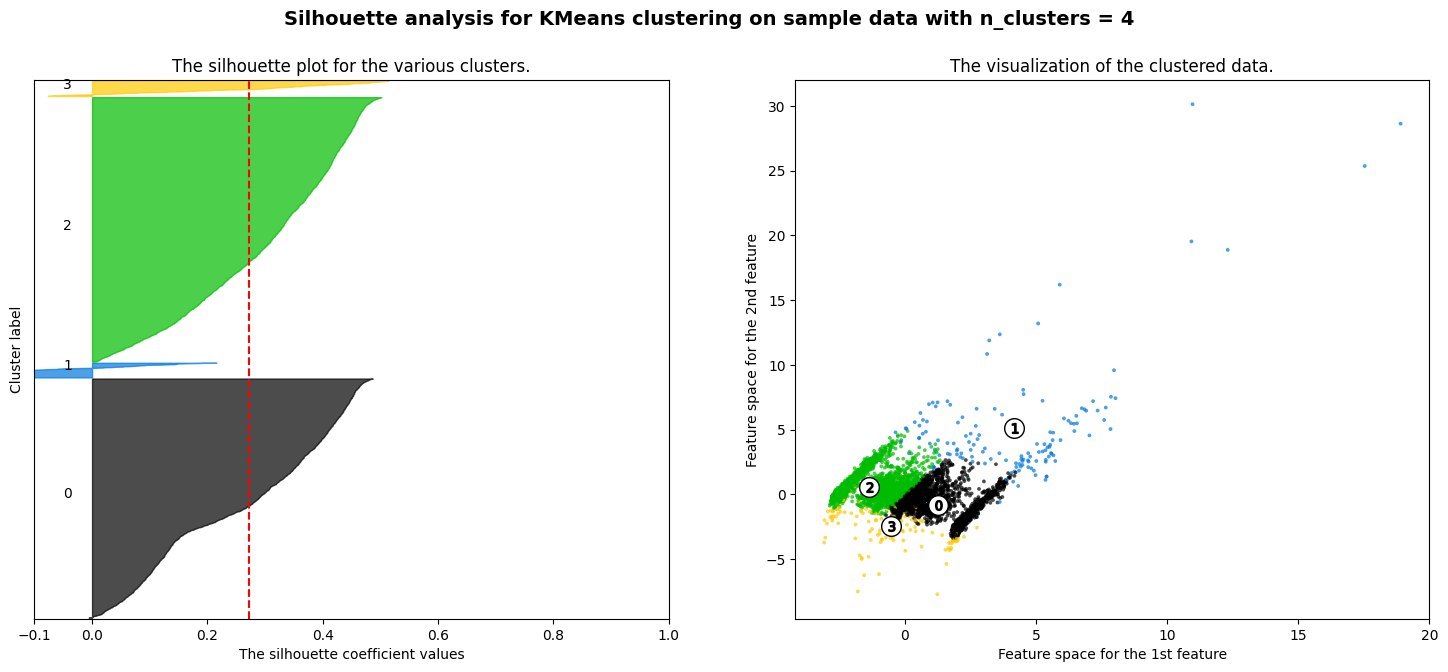

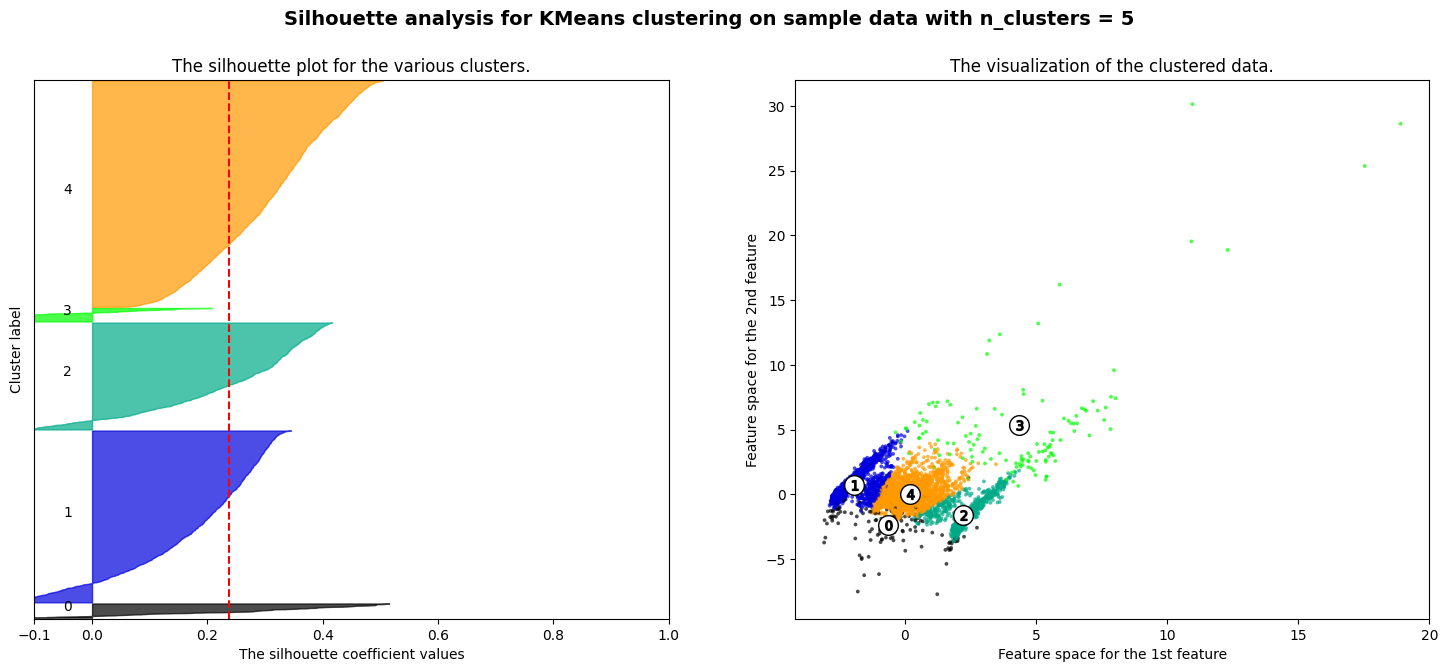

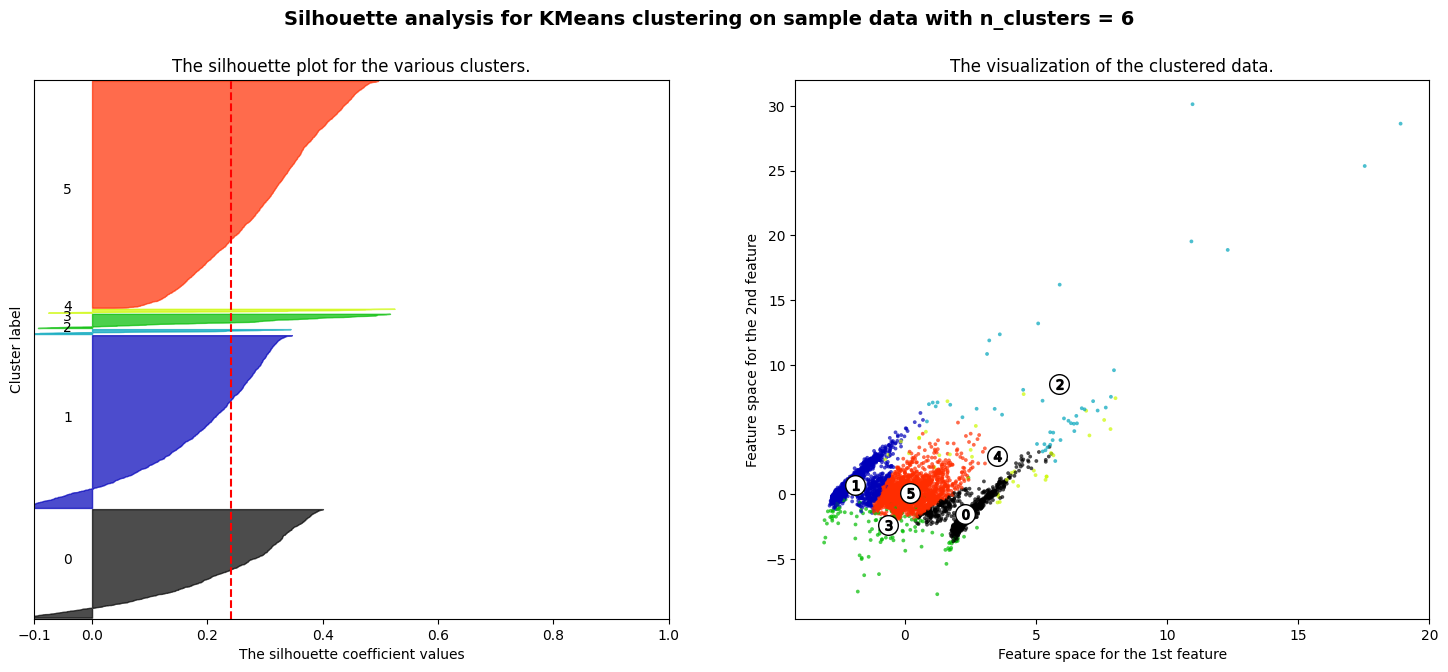

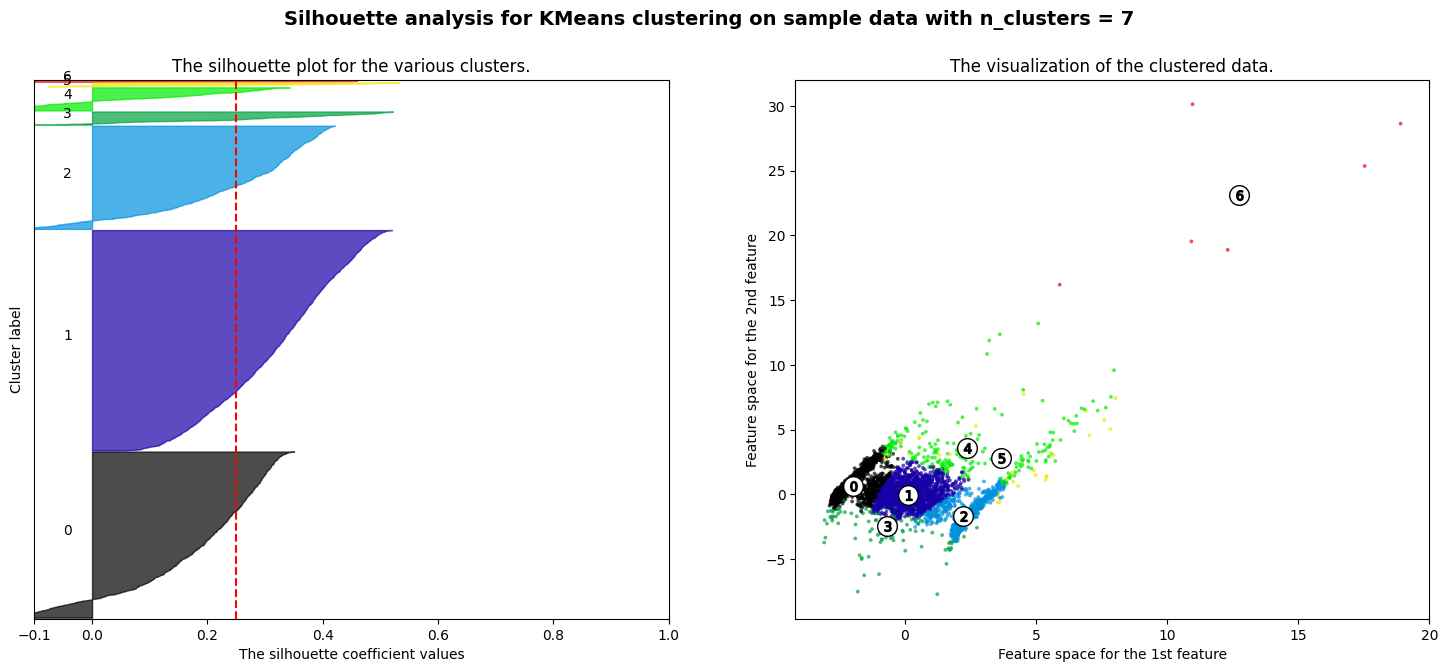

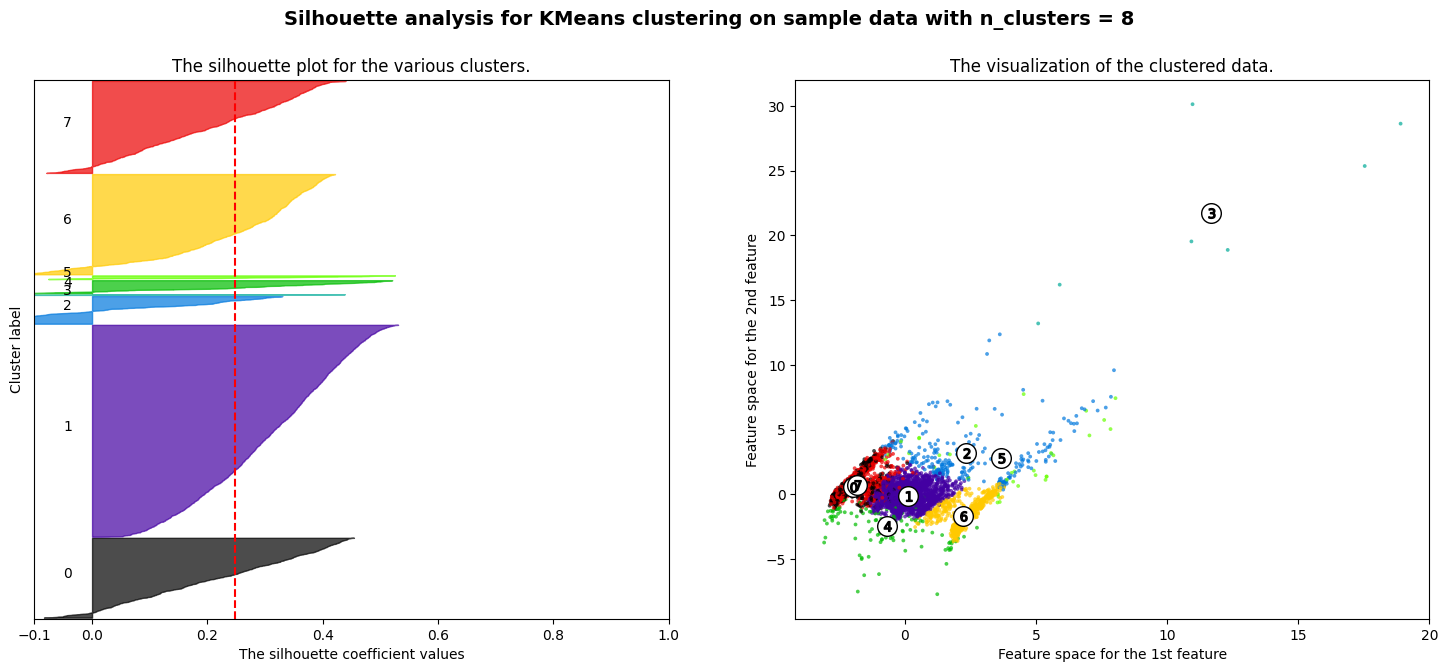

In [20]:
visualize_silhouette(max_clusters=8, X=X_reduced, random_state=10)

For n_clusters = 2 The average silhouette_score is : 0.19919967382453047
For n_clusters = 3 The average silhouette_score is : 0.21238428422148908
For n_clusters = 4 The average silhouette_score is : 0.21846259845030108
For n_clusters = 5 The average silhouette_score is : 0.2055016602111605
For n_clusters = 6 The average silhouette_score is : 0.20861307391519884
For n_clusters = 7 The average silhouette_score is : 0.2137422138377995
For n_clusters = 8 The average silhouette_score is : 0.21817268912132334


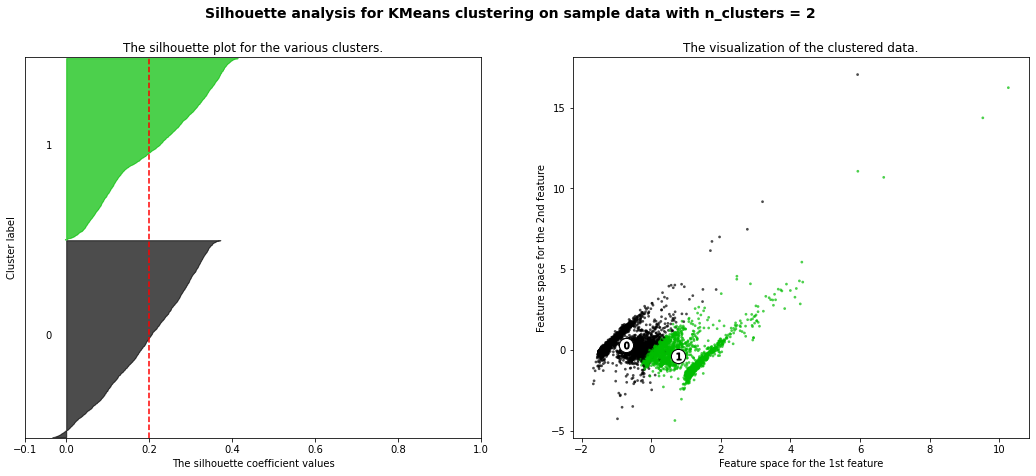

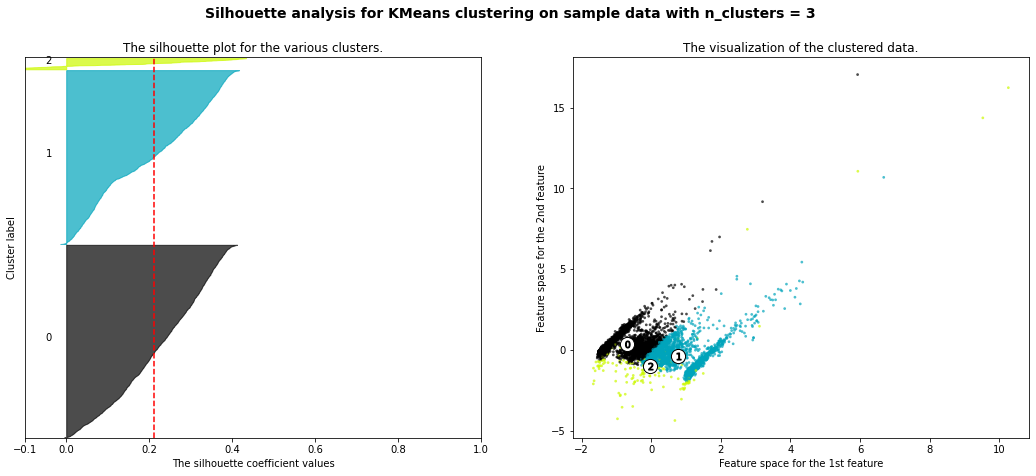

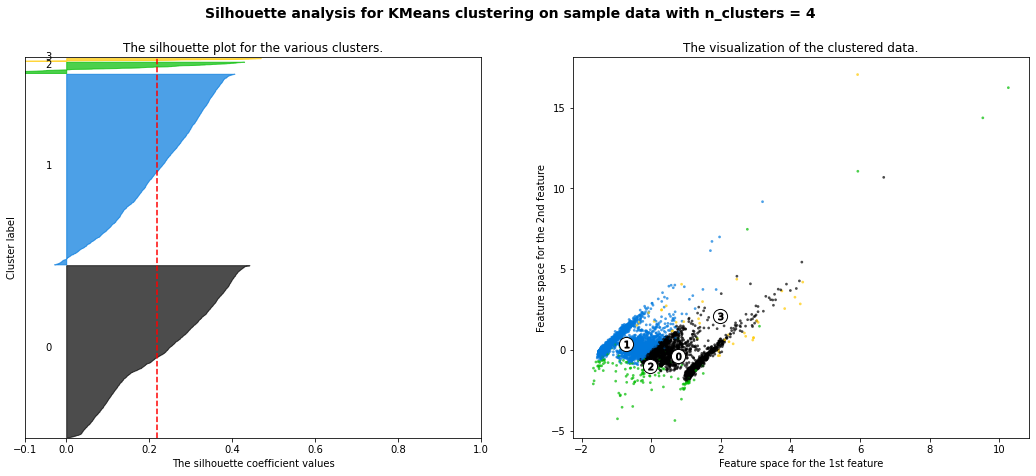

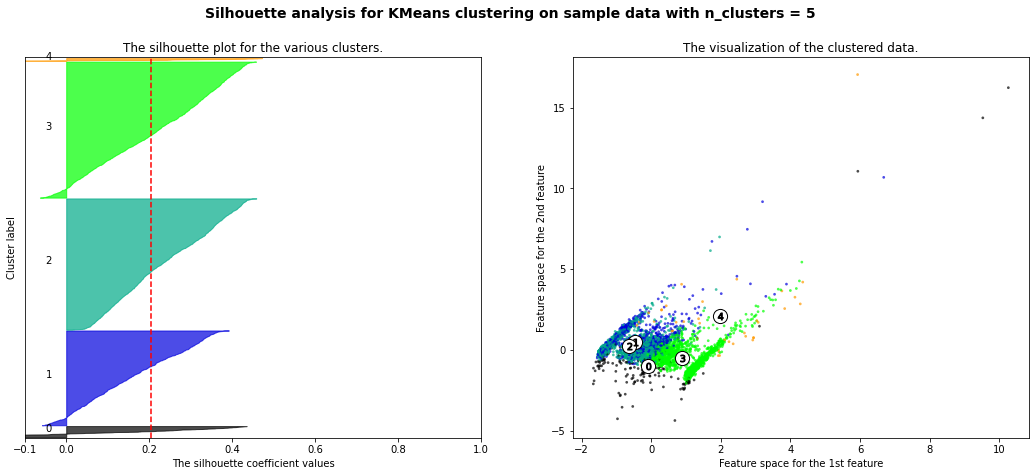

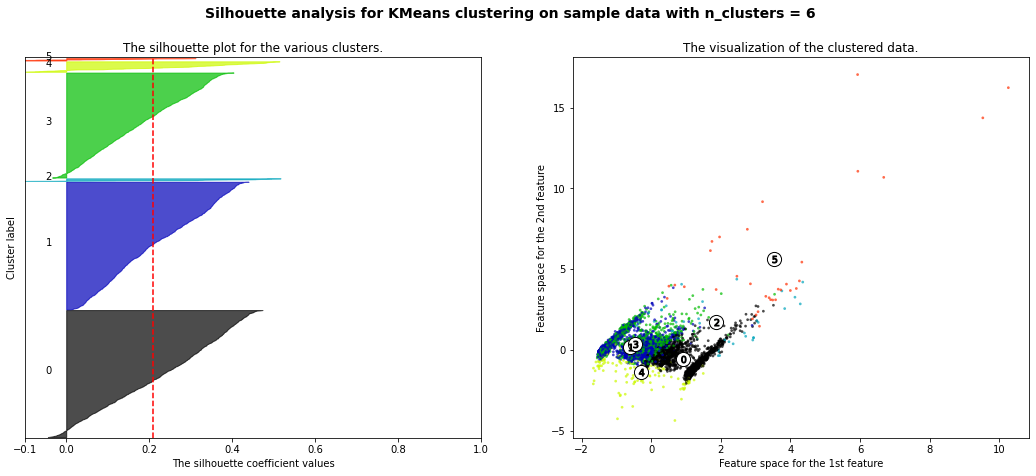

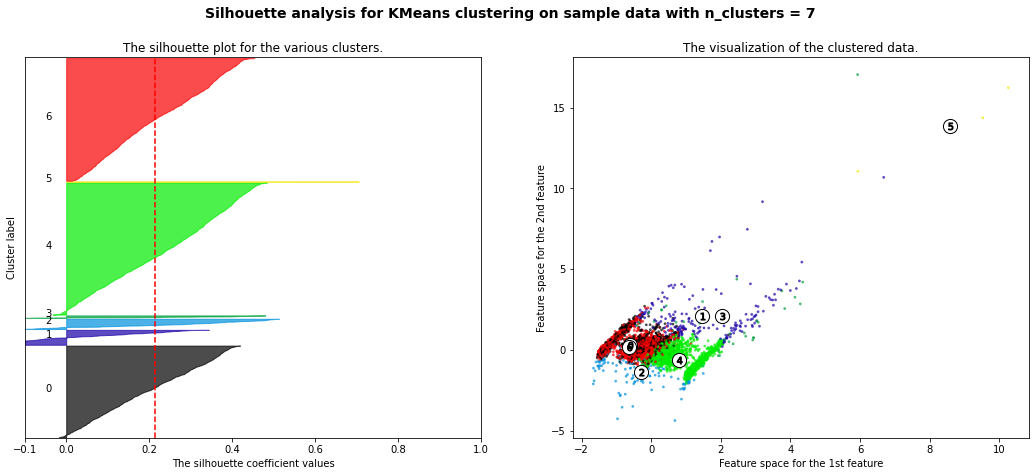

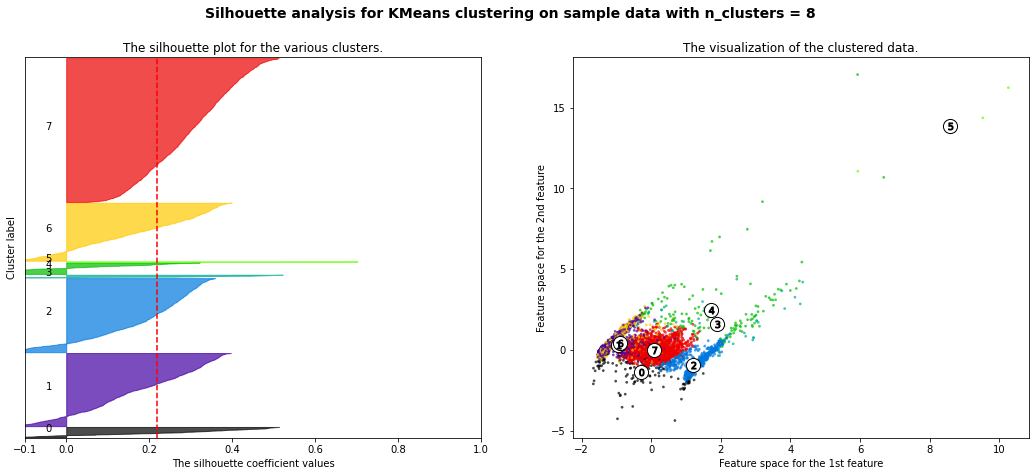

In [18]:
# YOUR CODE HERE

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [21]:
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

In [19]:
# YOUR CODE HERE
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [26]:
# YOUR CODE HERE
import numpy as np
cluster_labels = km.labels_
cluster_counts = np.bincount(cluster_labels)

print("Number of clusters: ", km.n_clusters)
print("Cluster 0 count: ", cluster_counts[0])
print("Cluster 1 count: ", cluster_counts[1])
print("Cluster 2 count: ", cluster_counts[2])
print("Cluster 3 count: ", cluster_counts[3])

Number of clusters:  4
Cluster 0 count:  2241
Cluster 1 count:  138
Cluster 2 count:  2479
Cluster 3 count:  142


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [27]:
# YOUR CODE HERE
past['cluster_pca'] = cluster_labels
past.head()
past['cluster_pca'].value_counts()

2    2479
0    2241
3     142
1     138
Name: cluster_pca, dtype: int64

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*
    Cluster 0: These are customers viewing items or purchasing mainly in 2020. Their activity is similar to cluster 2.
    Cluster 1: These customers buy the lowest cost items  but spend the most time window shopping. 
    Cluster 2: These are customers viewing items or purchasing mainly in 2019. Their activity is similar to cluster 0.
    Cluster 3: These customers buy the highest cost items and do the least amount of window shopping.

In [28]:
# YOUR CODE HERE
past.head()
past.groupby('cluster_pca').mean().T

cluster_pca,0,1,2,3
NumOfEventsInJourney,1.827870,5.679602e+00,1.883411,1.453407
NumSessions,1.274699,3.038223e+00,1.287889,1.174003
interactionTime,205614.990731,2.340986e+06,180479.548946,97669.010001
maxPrice,6.348720,4.755611e+00,5.607652,59.879407
minPrice,6.319329,4.516717e+00,5.587247,59.830235
NumCart,0.505780,1.603181e+00,0.539658,0.121535
NumView,0.859364,1.994399e+00,0.844627,1.222118
NumRemove,0.364530,1.919798e+00,0.393568,0.073655
InsessionCart,19.452438,1.727600e+02,19.037594,2.978103
InsessionView,14.094671,6.127143e+01,14.789467,6.209731


10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
Assumptions for K-means:
K-means can only finds spherical shaped clusters. 
The clusters found depend on the centroid initialization. 
It attempts to minimize the within-cluster sum of squares.

Based on my analysis of the 4 clusters chosen - K-Means was not a good approach for this problem.  Two of the clusters were very large and mainly differed by viewing/purchase date. The remaining two clusters were very small.

In [39]:
# YOUR CODE HERE
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.5, min_samples=10).fit(X_reduced)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


past['dbscan_pca'] = labels
past['dbscan_pca'].value_counts()

Estimated number of clusters: 6
Estimated number of noise points: 2656


-1    2656
 0    1387
 2     639
 1     293
 4      12
 3       9
 5       4
Name: dbscan_pca, dtype: int64

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*
The DBSCAN alogrithm found 6 clusters and 2,656 customers who were outliers (noise points). The number of clusters found depends on the eps and min_samples input values. 3 of the 5 clusters were extremely small and hence not useful.  I would increase the number of priciple components used in the clustering. The 5 PCA components only explained 34% of the variance. Using more principal components may result in "better" clusters.  Then I would try KMeans again or try another clustering alogrithm (not DBSAN).  

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [40]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [41]:
assert new.shape == (30091, 5)

In [42]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [43]:
past = pd.read_csv('../dat/past.csv.gz')
print(past.shape)
print(new.shape)

(5000, 37)
(30091, 5)


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*
There a 6 times more data points in new when compared to past.  New has only 4 features while past and 36 features. New does not have any customer purchasing behavior features.

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

There are no product IDs in common between the 2 datasets.

In [44]:
# YOUR CODE HERE
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
c = np.intersect1d(a,b)
print(c)
c = set(a).intersection(b)
print(c)

common_id = set(past['product_id'].to_numpy()).intersection(new['product_id'].to_numpy())
print(common_id)


[]
set()
set()


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [46]:
# YOUR CODE HERE # ~.344
print("Past")
print(past['Purchased?'].value_counts(normalize=True))
print("New")
print(new['Purchased?'].value_counts(normalize=True))


Past
0    0.6562
1    0.3438
Name: Purchased?, dtype: float64
New
0    0.655744
1    0.344256
Name: Purchased?, dtype: float64


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [47]:
# YOUR CODE HERE
X_train = past[['maxPrice','minPrice','Category']].to_numpy()
y_train = past['Purchased?'].to_numpy()
X_test  = new[['maxPrice','minPrice','Category']].to_numpy()
y_test  = new['Purchased?'].to_numpy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5000, 3)
(5000,)
(30091, 3)
(30091,)


In [48]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

In [49]:
def train(X, y, standardize = True) -> None:
    
    if standardize == True:
        pipe = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression(class_weight='balanced',random_state=0))])
    else:
        pipe = Pipeline([('classifier', LogisticRegression(class_weight='balanced',random_state=0))])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    return y_pred
    
y_pred = train(X_train, y_train)   

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [31]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [51]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)
X.shape

(35091, 3)

In [52]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [53]:
# YOUR CODE HERE
dummy = np.ones(30091)*(-1)
print(dummy.shape)
y = np.concatenate((y_train, dummy), axis=0)
y.shape

(30091,)


(35091,)

In [54]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [55]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
label_spreading_model = LabelSpreading(alpha=0.01, kernel='knn')
label_spreading_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [56]:
semi_sup_preds = label_spreading_model.transduction_[5000:]  # YOUR CODE HERE

In [57]:
print(semi_sup_preds.shape)
print(X_test.shape)

(30091,)
(30091, 3)


In [58]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

In [59]:
print(classification_report(y_test, semi_sup_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



10. Print the classification report

In [39]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.93      0.87     19732
           1       0.83      0.62      0.71     10359

    accuracy                           0.83     30091
   macro avg       0.83      0.78      0.79     30091
weighted avg       0.83      0.83      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *YOUR ANSWER HERE*
Recall increased from .49 to .62 for the semi supervised model.  Accuracy increased from .79 to .83 for the semi supervised model. Thus, the semi supervised model did better than logistic regression.  It is not clear to me why the semi supervised model did better. Perhaps semi supervised learning is more flexible than logistic regression and can do better with a small number of features and a small number of labeled data points.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)